In [2]:
pip install tkinter

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
from PIL import Image, ImageTk
import cv2
import numpy as np


In [90]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import cv2

class MediaProcessorApp:
    def __init__(self, root):
        self.op=0
        self.cl=0
        self.eroded=None
        self.dilated= None
        self.root = root
        self.root.title("Media Processor")
        self.root.configure(bg="#f0f0f0")  # Set background color
        
        self.frame = tk.Frame(self.root, bg="#f0f0f0")  # Set frame background color
        self.frame.pack(padx=10, pady=10)
        
        self.upload_button = tk.Button(self.frame, text="Upload Media", command=self.upload_media, bg="#4CAF50", fg="white", font=("Arial", 12))
        self.upload_button.pack(side="top", padx=5, pady=5, fill=tk.X)  # Set button fill to extend to the width
        
        self.canvas = tk.Canvas(self.frame, bg="white", bd=2, relief=tk.RAISED)  # Set canvas background, border, and relief
        self.canvas.pack(side="top", padx=5, pady=5, fill=tk.BOTH, expand=True)  # Fill canvas to expand to available space

        self.media_path = None
        self.media_type = None
        self.current_image = None
        self.current_frame = 0

        self.process_options = tk.StringVar(root)
        self.process_options.set("Select Process") # default value
        self.process_menu = CustomOptionMenu(self.frame, self.process_options, "Convert to Grayscale", "Thresholding", "Histogram Equalization", "Averaging Filter", "Laplacian", "Adaptive Thresholding", "Clustering (with optimal number of clusters)", "LoG", "Erosion", "Dilation", "Opening", "Closing", "Histogram Eq Compression" ,command=self.process_selected)
        self.process_menu.config(bg="#4CAF50", fg="white", font=("Arial", 12))  # Set dropdown menu color and font
        self.process_menu.pack(side="top", padx=5, pady=5, fill=tk.X)  # Set menu fill to extend to the width
        self.prev_button = tk.Button(self.frame, text="Prev", command=self.show_previous_frame, bg="#4CAF50", fg="white", font=("Arial", 12))
        self.prev_button.pack(side="left", padx=5, pady=5, fill=tk.X)
        
        self.next_button = tk.Button(self.frame, text="Next", command=self.show_next_frame, bg="#4CAF50", fg="white", font=("Arial", 12))
        self.next_button.pack(side="right", padx=5, pady=5, fill=tk.X)

        
        # Call the method to initialize PhotoImage objects
        self.init_photo_images()

    def init_photo_images(self):
        # Initialize PhotoImage objects here
        self.blank_photo = ImageTk.PhotoImage(Image.new("RGB", (1, 1), "white"))

    def upload_media(self):
        self.media_path = filedialog.askopenfilename()
        if self.media_path:
            if self.media_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                self.media_type = 'image'
            elif self.media_path.lower().endswith(('.mp4', '.avi', '.mov')):
                self.media_type = 'video'
            self.display_media()
        
    def show_previous_frame(self):
        if self.media_type == 'video' and self.current_frame > 0:
            cap = cv2.VideoCapture(self.media_path)
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if self.current_frame < total_frames:
                self.current_frame -= 1
                cap.set(cv2.CAP_PROP_POS_FRAMES, self.current_frame)
                ret, frame = cap.read()
                if ret:
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    self.display_frame(frame)
            cap.release()

    def show_next_frame(self):
        if self.media_type == 'video':
            cap = cv2.VideoCapture(self.media_path)
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if self.current_frame < total_frames:
                self.current_frame += 1
                cap.set(cv2.CAP_PROP_POS_FRAMES, self.current_frame)
                ret, frame = cap.read()
                if ret:
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    self.display_frame(frame)
            cap.release()
    def display_media(self):
        if self.media_type == 'image':
            img = cv2.imread(self.media_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_height, img_width, _ = img.shape
            max_canvas_width = self.canvas.winfo_width()
            max_canvas_height = self.canvas.winfo_height()
            aspect_ratio = img_width / img_height
            canvas_aspect_ratio = max_canvas_width / max_canvas_height
            
            if aspect_ratio > canvas_aspect_ratio:
                new_width = max_canvas_width
                new_height = int(new_width / aspect_ratio)
            else:
                new_height = max_canvas_height
                new_width = int(new_height * aspect_ratio)
            
            img = cv2.resize(img, (new_width, new_height))
            self.current_image = Image.fromarray(img)
            img = ImageTk.PhotoImage(self.current_image)
            self.canvas.create_image(0, 0, anchor="nw", image=img)
            self.canvas.image = img
        elif self.media_type == 'video':
            cap = cv2.VideoCapture(self.media_path)
            ret, frame = cap.read()
            if ret:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                self.display_frame(frame)
            cap.release()
            self.current_frame = 0
    
        
    def display_original_image(self):
        if self.current_image:
            img = ImageTk.PhotoImage(self.current_image)
            self.canvas.create_image(0, 0, anchor="nw", image=img)
            self.canvas.image = img
    def display_frame(self, frame):
    # Resize the frame to fit the canvas
        img_height, img_width, _ = frame.shape
        max_canvas_width = self.canvas.winfo_width()
        max_canvas_height = self.canvas.winfo_height()
        aspect_ratio = img_width / img_height
        canvas_aspect_ratio = max_canvas_width / max_canvas_height
        
        if aspect_ratio > canvas_aspect_ratio:
            new_width = max_canvas_width
            new_height = int(new_width / aspect_ratio)
        else:
            new_height = max_canvas_height
            new_width = int(new_height * aspect_ratio)
        
        frame = cv2.resize(frame, (new_width, new_height))
        self.current_image = Image.fromarray(frame)
        img = ImageTk.PhotoImage(self.current_image)
        self.canvas.create_image(0, 0, anchor="nw", image=img)
        self.canvas.image = img
    def process_selected(self, selected_option):
        # Clear any existing labels on the canvas
        for widget in self.canvas.winfo_children():
            widget.destroy()

        if selected_option == "Convert to Grayscale":
            self.convert_to_grayscale()
        elif selected_option == "Thresholding":
            self.apply_threshold()
        elif selected_option == "Histogram Equalization":
            self.apply_histogram_equalization()
        elif selected_option == "Averaging Filter":
            self.apply_averaging_filter()
        elif selected_option == "Laplacian":
            self.apply_laplacian()
        elif selected_option == "Adaptive Thresholding":
            self.apply_adaptive_thresholding()
        elif selected_option == "Clustering (with optimal number of clusters)":
            self.clustering_method()
        elif selected_option == "LoG":
            self.apply_log()
        elif selected_option == "Erosion":
            self.apply_erosion()
        elif selected_option == "Dilation":
            self.apply_dilation()
        elif selected_option == "Opening":
            self.apply_opening()
        elif selected_option == "Closing":
            self.apply_closing()
        elif selected_option == "Histogram Eq Compression":
            self.apply_histogram_equalization_comp()
    def apply_histogram_equalization_comp(self):
        if self.current_image:
            self.current_image= self.current_image.convert('L')
            img_array = np.array(self.current_image)
            if len(image.shape) > 2:
                image_array = np.mean(image_array, axis=2).astype(np.uint8)
            histogram, bins = np.histogram(img_array.flatten(), 256, [0,256])
    
            # Compute cumulative distribution function (CDF)
            cdf = histogram.cumsum()
            cdf_normalized = cdf * 255 / cdf[-1]  # Normalize CDF
            
            # Perform histogram equalization
            equalized_image = np.interp(img_array.flatten(), bins[:-1], cdf_normalized)
            equalized_image = equalized_image.reshape(img_array.shape)
            
            equalized_img_list= equalized_image.astype(np.uint8)
        
        

            
            equalized_image_cv2 = cv2.equalizeHist(img_array)

            self.display_processed_images(equalized_image_cv2, equalized_img_list, "Histogram Eq Compression")
        



        
    def apply_erosion(self):
        if self.current_image:
            img_array = np.array(self.current_image)
            cv2_eroded_img = cv2.erode(img_array, np.ones((5,5),np.uint8), iterations=1)
            list_eroded_img = self.apply_erosion_list_manipulation()
            self.display_processed_images(cv2_eroded_img, list_eroded_img, "Erosion")

    def apply_dilation(self):
        if self.current_image:
            img_array = np.array(self.current_image)
            cv2_dilated_img = cv2.dilate(img_array, np.ones((5,5),np.uint8), iterations=1)
            list_dilated_img = self.apply_dilation_list_manipulation()
            self.display_processed_images(cv2_dilated_img, list_dilated_img, "Dilation")

    def apply_opening(self):
        self.op=1
        if self.current_image:
            self.current_image= self.current_image.convert("L")
            self.eroded = self.apply_erosion_list_manipulation()
            opened_img = self.apply_dilation_list_manipulation()
            cv2_opened_img = cv2.morphologyEx(np.array(self.current_image), cv2.MORPH_OPEN, np.ones((5,5),np.uint8))            
            self.display_processed_images(cv2_opened_img, opened_img, "Opening")
        self.op= 0

    def apply_closing(self):
        self.cl= 1
        if self.current_image:
            self.dilated = self.apply_dilation_list_manipulation()
            closed_img = self.apply_erosion_list_manipulation()
            cv2_closed_img = cv2.morphologyEx(np.array(self.current_image), cv2.MORPH_CLOSE, np.ones((5,5),np.uint8))
            self.display_processed_images(cv2_closed_img, closed_img, "Closing")
        self.cl= 0


    def apply_erosion_list_manipulation(self):
        if self.cl:
            img_array = np.array(self.dilated)
            eroded_img = np.zeros_like(img_array)
            for i in range(2, img_array.shape[0]-2):
                for j in range(2, img_array.shape[1]-2):
                    if np.all(img_array[i-2:i+3, j-2:j+3]):
                        eroded_img[i, j] = 255
            return eroded_img
        if self.current_image:
            img_array = np.array(self.current_image)
            eroded_img = np.zeros_like(img_array)
            for i in range(2, img_array.shape[0]-2):
                for j in range(2, img_array.shape[1]-2):
                    if np.all(img_array[i-2:i+3, j-2:j+3]):
                        eroded_img[i, j] = 255
            return eroded_img

    def apply_dilation_list_manipulation(self):
        if self.op:
            img_array = np.array(self.eroded)
            dilated_img = np.zeros_like(img_array)
            for i in range(2, img_array.shape[0]-2):
                for j in range(2, img_array.shape[1]-2):
                    if np.any(img_array[i-2:i+3, j-2:j+3]):
                        dilated_img[i, j] = 255
            return dilated_img
            
        if self.current_image:
            img_array = np.array(self.current_image)
            dilated_img = np.zeros_like(img_array)
            for i in range(2, img_array.shape[0]-2):
                for j in range(2, img_array.shape[1]-2):
                    if np.any(img_array[i-2:i+3, j-2:j+3]):
                        dilated_img[i, j] = 255
            return dilated_img
    def apply_adaptive_thresholding(self):
        if self.current_image:
            img_array = np.array(self.current_image)
            grayscale_img = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
            adaptive_threshold = cv2.adaptiveThreshold(grayscale_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
            adaptive_threshold_img = Image.fromarray(adaptive_threshold)
            adaptive_threshold_img = ImageTk.PhotoImage(adaptive_threshold_img)
            self.canvas.create_image(0, 0, anchor="nw", image=adaptive_threshold_img)
            self.canvas.image = adaptive_threshold_img

    def clustering_method(self):
        # Perform clustering with optimal number of clusters using the elbow method
        image= np.array(self.current_image)
        pixels = image.reshape((-1, 3))
        pixels = np.float32(pixels)
        
        # Set the range of k values to test
        k_values = range(1, 11)  # Test k values from 1 to 10
        
        # Initialize list to store the sum of squared distances
        sum_squared_distances = []
        
        # Iterate through each k value and perform clustering
        for k in k_values:
            criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
            _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
            centers = np.uint8(centers)
            clustered_pixels = centers[labels.flatten()]
            clustered_image = clustered_pixels.reshape(image.shape)
            
            # Calculate sum of squared distances
            sum_squared_distance = np.sum((pixels - centers[labels.flatten()]) ** 2)
            sum_squared_distances.append(sum_squared_distance)
        
        # Find the optimal k using the elbow method
        optimal_k = self.find_optimal_k(k_values, sum_squared_distances)
        
        # Perform clustering with the optimal k
        _, labels, centers = cv2.kmeans(pixels, optimal_k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        centers = np.uint8(centers)
        clustered_pixels = centers[labels.flatten()]
        clustered_image = clustered_pixels.reshape(image.shape)
        img = Image.fromarray(clustered_image)
        img = ImageTk.PhotoImage(img)
        self.canvas.create_image(0, 0, anchor="nw", image=img)
        self.canvas.image = img
        
    
    def find_optimal_k(self, k_values, sum_squared_distances):
        # Find the optimal k using the elbow method
        # The optimal k is the value at the "elbow point" on the plot
        deltas = np.diff(sum_squared_distances, 2)
        knee_index = np.argmax(deltas) + 2
        
        return k_values[knee_index]

    def apply_log(self):
        if self.current_image:
            img_array = np.array(self.current_image)
            grayscale_img = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
            laplacian_of_gaussian = cv2.Laplacian(grayscale_img, cv2.CV_64F)
            log_img = np.uint8(np.absolute(laplacian_of_gaussian))
            log_img = Image.fromarray(log_img)
            log_img = ImageTk.PhotoImage(log_img)
            self.canvas.create_image(0, 0, anchor="nw", image=log_img)
            self.canvas.image = log_img


    def convert_to_grayscale(self):
        if self.current_image:
            grayscale_img = self.current_image.convert("L")
            grayscale_img = ImageTk.PhotoImage(grayscale_img)
            self.canvas.create_image(0, 0, anchor="nw", image=grayscale_img)
            self.canvas.image = grayscale_img
    
    def apply_threshold(self):
        if self.current_image:
            threshold_value = self.process_menu.get_threshold_value()
            grayscale_img = self.current_image.convert("L")
            img_array = np.array(grayscale_img)
            thresholded_img = np.where(img_array > threshold_value, 255, 0).astype(np.uint8)
            thresholded_img = Image.fromarray(thresholded_img)
            thresholded_img = ImageTk.PhotoImage(thresholded_img)
            self.canvas.create_image(0, 0, anchor="nw", image=thresholded_img)
            self.canvas.image = thresholded_img

    def apply_histogram_equalization(self):
        if self.current_image:
            grayscale_img = self.current_image.convert("L")
            img_array = np.array(grayscale_img)
            equalized_img = cv2.equalizeHist(img_array)
            equalized_img = Image.fromarray(equalized_img)
            equalized_img = ImageTk.PhotoImage(equalized_img)
            self.canvas.create_image(0, 0, anchor="nw", image=equalized_img)
            self.canvas.image = equalized_img
    
    def apply_averaging_filter(self, kernel_size=(3, 3)):
        if self.current_image:
            img_array = np.array(self.current_image)
            blurred_img = cv2.blur(img_array, kernel_size)
            blurred_img = Image.fromarray(blurred_img)
            blurred_img = ImageTk.PhotoImage(blurred_img)
            self.canvas.create_image(0, 0, anchor="nw", image=blurred_img)
            self.canvas.image = blurred_img
    
    def apply_laplacian(self):
        if self.current_image:
            img_array = np.array(self.current_image)
            laplacian_img = cv2.Laplacian(img_array, cv2.CV_64F)
            laplacian_img = np.uint8(np.absolute(laplacian_img))
            laplacian_img = Image.fromarray(laplacian_img)
            laplacian_img = ImageTk.PhotoImage(laplacian_img)
            self.canvas.create_image(0, 0, anchor="nw", image=laplacian_img)
            self.canvas.image = laplacian_img


    def display_processed_images(self, cv2_processed_img, list_processed_img, title):
        # Clear any existing labels on the canvas
        for widget in self.canvas.winfo_children():
            widget.destroy()

        # Display new processed image
        img_cv2 = Image.fromarray(cv2_processed_img)
        img_cv2 = ImageTk.PhotoImage(img_cv2)
        label_cv2 = tk.Label(self.canvas, image=img_cv2, text=f"CV2 - {title}", compound=tk.TOP)
        label_cv2.image = img_cv2
        label_cv2.pack(side="left", padx=5, pady=5)

        if list_processed_img is not None:
            img_list = Image.fromarray(list_processed_img)
            img_list = ImageTk.PhotoImage(img_list)
            label_list = tk.Label(self.canvas, image=img_list, text=f"List Manipulation - {title}", compound=tk.TOP)
            label_list.image = img_list
            label_list.pack(side="left", padx=5, pady=5)
        else:
            self.canvas.image = img_cv2



class CustomOptionMenu(tk.OptionMenu):
    def __init__(self, master, variable, *options, **kwargs):
        self.threshold_var = tk.DoubleVar()
        self.threshold_var.set(128)  
        self.threshold_slider = tk.Scale(master, from_=0, to=255, orient=tk.HORIZONTAL, variable=self.threshold_var, label="Threshold Value", length=200)
        self.threshold_slider.pack_forget()
        
        super().__init__(master, variable, *options, **kwargs)
        self["menu"].add_command(label="Thresholding", command=self.show_threshold_slider)
        self.bind("<FocusOut>", lambda _: self.hide_threshold_slider())
    
    def show_threshold_slider(self):
        self.threshold_slider.pack(side="top", padx=5, pady=5, fill=tk.X)
    
    def hide_threshold_slider(self):
        self.threshold_slider.pack_forget()
    
    def get_threshold_value(self):
        return self.threshold_var.get()

root = tk.Tk()
app = MediaProcessorApp(root)
root.mainloop()


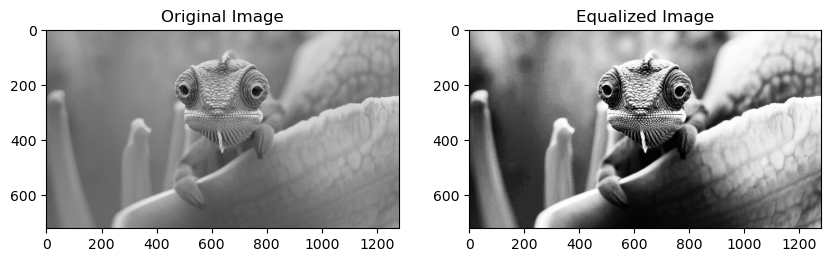

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Compute histogram
    histogram, bins = np.histogram(image.flatten(), 150, [0,256])
    
    # Compute cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]  # Normalize CDF
    
    # Perform histogram equalization
    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    equalized_image = equalized_image.reshape(image.shape)
    
    return equalized_image.astype(np.uint8)

# Load the image (you need to replace 'input_image.jpg' with your image path)
image = plt.imread('hello.jpg')

# Convert image to grayscale if it's not already
if len(image.shape) > 2:
    image = np.mean(image, axis=2).astype(np.uint8)

# Perform histogram equalization
equalized_image = histogram_equalization(image)

# Display original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()


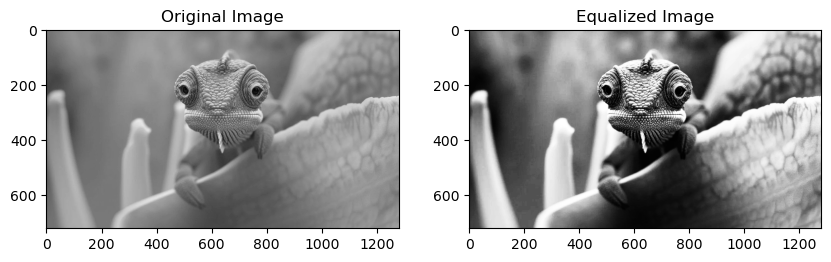

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('hello.jpg', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()


In [8]:
image = cv2.imread('hello.jpg', cv2.IMREAD_GRAYSCALE)

histogram, bins = np.histogram(image.flatten(), 256, [0,256])


In [11]:
bins

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15